# Data with Pandas

Since Pandas is a third-party Python library (not part of the standard Python libraries), we need to **import** it.


### <font color='red'>***You must run this next cell in order for any of the pandas steps to work!***</font>

In [1]:
import pandas as pd

### The data we're using today

For this lesson, we will be using the Portal Teaching data (https://figshare.com/articles/Portal_Project_Teaching_Database/1314459), a subset of the data from Ernst et al Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA (http://onlinelibrary.wiley.com/doi/10.1890/15-2115.1/abstract)

This section will use the **surveys.csv** file that you downloaded along with this notebook (in the **python-intro-workshop** folder), so it should be ready to go.

(If needed, it can also be downloaded from here:  https://ndownloader.figshare.com/files/2292172)

Each row records the species and weight of each animal caught in plots in the study area.

The columns represent:

| Column 	| Description |
| --- | --- |
| record_id |	Unique id for the observation|
| month |	month of observation |
|day 	|day of observation|
|year |	year of observation|
|plot_id 	|ID of a particular plot|
|species_id |	2-letter code|
|sex |	sex of animal ("M", "F")|
|hindfoot_length |	length of the hindfoot in mm|
|weight |	weight of the animal in grams|

Each time we call a function that's in a library, we use the syntax *LibraryName.FunctionName*. Adding the library name with a `.` before the function name tells Python where to find the function. In the example above, we have imported Pandas as `pd`. This means we don't have to type out `pandas` each time we call a Pandas function.

Let's use panda's built-in function that reads in a CSV file:

In [2]:
pd.read_csv("surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


That read our CSV file, but we'd like to store it as an **object**.  So we'll create a variable for it, called `surveys_df`.  This is just like how we used a variable above to store an integer, or a string, or a list, or a dictionary.  We're just storing a Pandas DataFrame object instead.

Make sure to run the cell below:

In [3]:
surveys_df = pd.read_csv("surveys.csv")

Try evaluating `surveys_df`:

In [4]:
surveys_df 

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


How would you now check what **class** (type) of object `surveys_df` is?

`surveys_df` is a Pandas **DataFrame**.   A DataFrame is a 2-dimensional structure that can store data in rows and columns - similar to a spreadsheet or a table, but with some other nice features.  (Yes, it's very similar to a `data.frame` in R.)

Just like the Pandas *library* has functions, *objects* can have **functions** (which may take arguments) and **attributes** (which don't).

A Pandas DataFrame object has an attribute called `dtypes` which lists out the type of each column:

In [5]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

Try these to see what they do:

    surveys_df.columns
    surveys_df.head()
Also, what does `surveys_df.head(15)` do, versus `surveys_df.head(4)`?

    surveys_df.tail()
    surveys_df.shape
    
Take note of the output of the shape method. What format does it return the shape of the DataFrame in?


In [6]:
surveys_df.shape

(35549, 9)

What if we want to isolate just one column?  There are two ways we can do this:

In [7]:
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
5         PF
6         PE
7         DM
8         DM
9         PF
10        DS
11        DM
12        DM
13        DM
14        DM
15        DM
16        DS
17        PP
18        PF
19        DS
20        DM
21        NL
22        DM
23        SH
24        DM
25        DM
26        DM
27        DM
28        PP
29        DS
        ... 
35519     SF
35520     DM
35521     DM
35522     DM
35523     PB
35524     OL
35525     OT
35526     DO
35527     US
35528     PB
35529     OT
35530     PB
35531     DM
35532     DM
35533     DM
35534     DM
35535     DM
35536     DM
35537     PB
35538     SF
35539     PB
35540     PB
35541     PB
35542     PB
35543     US
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

or

In [8]:
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
5         PF
6         PE
7         DM
8         DM
9         PF
10        DS
11        DM
12        DM
13        DM
14        DM
15        DM
16        DS
17        PP
18        PF
19        DS
20        DM
21        NL
22        DM
23        SH
24        DM
25        DM
26        DM
27        DM
28        PP
29        DS
        ... 
35519     SF
35520     DM
35521     DM
35522     DM
35523     PB
35524     OL
35525     OT
35526     DO
35527     US
35528     PB
35529     OT
35530     PB
35531     DM
35532     DM
35533     DM
35534     DM
35535     DM
35536     DM
35537     PB
35538     SF
35539     PB
35540     PB
35541     PB
35542     PB
35543     US
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

Let's see what type `surveys_df['species_id']` is.  Try it.

In [9]:
type(surveys_df['species_id'])

pandas.core.series.Series

You can think of a Pandas **Series** as a series of observations of one variable.  It behaves like a Python list.

We can also slice and dice -- similar to how we selected parts of list objects above.  What does the next line do?

In [10]:
surveys_df[3:10]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


Another way to select is with `.loc`, which selects based on *labels* (as opposed to `.iloc` which selects using *numerical indices*).  Try this:

In [11]:
surveys_df.loc[[3, 10, 12], ['day', 'year', 'species_id']]

,day,year,species_id
3,16,1977,DM
10,16,1977,DS
12,16,1977,DM


We can also use `.query` to select only rows matching certain conditions.  Note that the query expression is in single quotes.

In [12]:
surveys_df.query('hindfoot_length < 10')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
407,408,11,14,1977,8,PF,F,9.0,6.0
5800,5801,4,29,1982,7,RM,NaN,8.0,16.0
10066,10067,3,16,1985,19,RM,M,6.0,16.0
19014,19015,9,9,1991,19,BA,F,7.0,11.0
19190,19191,10,11,1991,13,PF,F,8.0,15.0
19566,19567,1,8,1992,19,BA,M,6.0,8.0
20561,20562,12,22,1992,5,RM,F,9.0,17.0
21035,21036,8,19,1993,21,PF,F,7.0,6.0
31399,31400,9,30,2000,19,PB,M,2.0,30.0
31456,31457,9,31,2000,6,RM,M,8.0,8.0


There are other ways to do this.  Try this expression:

In [13]:
surveys_df['hindfoot_length'] < 10

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
35519    False
35520    False
35521    False
35522    False
35523    False
35524    False
35525    False
35526    False
35527    False
35528    False
35529    False
35530    False
35531    False
35532    False
35533    False
35534    False
35535    False
35536    False
35537    False
35538    False
35539    False
35540    False
35541    False
35542    False
35543    False
35544    False
35545    False
35546    False
35547    False
35548    False
Name: hindfoot_length, Length: 35549, dtype: bool

How can you use this to get back a data frame with only the rows in `surveys_df` where `hindfoot_length < 10`?

**Challenge**:  How might you query to get back only rows with `hindfoot_length < 10` **and** `weight > 10` in ONE expression?  (There is more than one way to accomplish this!)

Pandas has a handy function (well, it has many handy functions!) to get all the unique elements in the column:

In [14]:
unique_species = pd.unique(surveys_df['species_id'])

Try evaluting the **`.size`** attribute on the above result to see how many unique species there are in the data set.

In [15]:
unique_species.size

49

We see from above that we can also isolate just the data in one column.  Let's try isolating the `weight` column, and calling the **`describe()`** function to get some statistics on it.

In [16]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also get a quick pairwise correlation between every pair of numerical variables:

In [17]:
surveys_df.corr()

,record_id,month,day,year,plot_id,hindfoot_length,weight
record_id,1.000000,0.073746,0.017181,0.997570,-0.004048,-0.285324,-0.273123
month,0.073746,1.000000,0.011461,0.031071,0.020908,-0.013346,-0.002618
day,0.017181,0.011461,1.000000,0.018490,0.020142,-0.006067,-0.013013
year,0.997570,0.031071,0.018490,1.000000,-0.004230,-0.287259,-0.276595
plot_id,-0.004048,0.020908,0.020142,-0.004230,1.000000,-0.126284,-0.061435
hindfoot_length,-0.285324,-0.013346,-0.006067,-0.287259,-0.126284,1.000000,0.683813
weight,-0.273123,-0.002618,-0.013013,-0.276595,-0.061435,0.683813,1.000000


Pandas can also sort and group data based on the values in a column:

In [18]:
grouped_by_species = surveys_df.groupby('species_id')

Try running **`describe()`** on `grouped_by_species`:

In [19]:
grouped_by_species.describe()

day                                                        \
              count       mean        std   min    25%   50%    75%   max   
species_id                                                                  
AB            303.0  15.788779   8.667608   1.0   8.50  15.0  22.50  31.0   
AH            437.0  16.427918   8.911772   1.0   9.00  16.0  25.00  31.0   
AS              2.0  15.500000  12.020815   7.0  11.25  15.5  19.75  24.0   
BA             46.0  12.826087   6.004829   4.0   8.00  13.0  15.75  26.0   
CB             50.0  18.920000   8.363770   1.0  12.25  17.5  26.75  31.0   
CM             13.0  10.000000   5.291503   7.0   7.00   8.0  11.00  26.0   
CQ             16.0  15.625000   7.982272   4.0  11.00  15.0  17.50  31.0   
CS              1.0   1.000000        NaN   1.0   1.00   1.0   1.00   1.0   
CT              1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0   
CU              1.0  13.000000        NaN  13.0  13.00  13.0  13.00  13.0   
CV              1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0   
DM          10596.0  16.227067   8.139578   1.0  10.00  16.0  23.00  31.0   
DO           3027.0  15.822266   8.165877   1.0   9.00  16.0  22.00  31.0   
DS           2504.0  15.516773   8.399182   1.0   8.00  15.0  23.00  31.0   
DX             40.0  15.975000   8.459519   2.0   8.75  14.0  22.00  31.0   
NL           1252.0  16.611022   8.459693   1.0  10.00  16.0  24.00  31.0   
OL           1006.0  15.781312   8.155936   1.0   9.00  16.0  23.00  31.0   
OT           2249.0  16.415740   8.037786   1.0  10.00  16.0  23.00  31.0   
OX             12.0  15.833333   6.278873   3.0  11.00  18.0  19.00  27.0   
PB           2891.0  16.059841   8.282066   1.0   9.00  15.0  23.00  31.0   
PC             39.0  14.692308   8.201906   1.0   7.50  14.0  24.50  26.0   
PE           1299.0  16.020785   8.516296   1.0   9.00  15.0  24.00  31.0   
PF           1597.0  16.887289   7.552395   1.0  12.00  16.0  23.00  31.0   
PG              8.0  22.625000   9.241792   4.0  19.25  27.5  29.00  29.0   
PH             32.0  16.343750   9.202417   2.0   7.75  20.0  23.25  30.0   
PI              9.0  16.888889   5.797509   8.0  14.00  16.0  21.00  27.0   
PL             36.0  18.527778  10.308072   1.0   9.00  22.5  28.00  30.0   
PM            899.0  17.836485   8.312853   1.0  11.00  19.0  25.00  31.0   
PP           3123.0  16.342619   8.294959   1.0  10.00  16.0  23.00  31.0   
PU              5.0   9.400000   9.736529   1.0   2.00   4.0  20.00  20.0   
PX              6.0  12.833333   8.863784   1.0   8.25  11.0  19.00  25.0   
RF             75.0  10.960000   9.009664   1.0   4.00   9.0  14.00  30.0   
RM           2609.0  15.132618   8.285967   1.0   8.00  14.0  22.00  31.0   
RO              8.0  17.750000   9.422617   9.0  10.00  13.0  29.00  29.0   
RX              2.0  19.500000  14.849242   9.0  14.25  19.5  24.75  30.0   
SA             75.0  15.440000   9.749900   1.0   9.00  13.0  27.00  30.0   
SC              1.0   9.000000        NaN   9.0   9.00   9.0   9.00   9.0   
SF             43.0  17.604651  10.002713   4.0   7.00  18.0  27.50  31.0   
SH            147.0  12.755102   8.427444   1.0   5.00  11.0  19.00  31.0   
SO             43.0  12.837209   8.193872   2.0   7.00  10.0  18.00  31.0   
SS            248.0  15.262097   8.754863   1.0   8.00  15.0  24.00  31.0   
ST              1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0   
SU              5.0  25.800000   7.726578  12.0  29.00  29.0  29.00  30.0   
UL              4.0  13.500000   8.020806   2.0  11.00  16.5  19.00  19.0   
UP              8.0  17.125000   6.621124   4.0  15.25  21.0  21.00  22.0   
UR             10.0  21.100000   5.685264   9.0  18.75  24.5  25.00  25.0   
US              4.0  31.000000   0.000000  31.0  31.00  31.0  31.00  31.0   
ZL              2.0  18.500000   2.121320  17.0  17.75  18.5  19.25  20.0   

           hindfoot_length              ...    weight            year  \
               

Now we're going to create some series with:

* The number of animals observed per species
* The mean weight of all animals observed in each species

In [20]:
# a series with the number of samples by species
species_counts = grouped_by_species.size()
# a series with the mean weight by species
species_mean_weights = grouped_by_species['weight'].mean()

Let's look at each - notice that each is a Series:

Let's try creating some quick bar charts.  First we need to make sure figures appear inline in the notebook:

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

And now we'll create some quick charts:

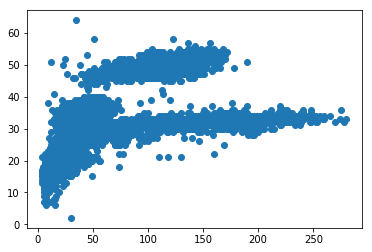

In [22]:
plt.scatter(x = surveys_df.weight, y=surveys_df.hindfoot_length)

plt.show()

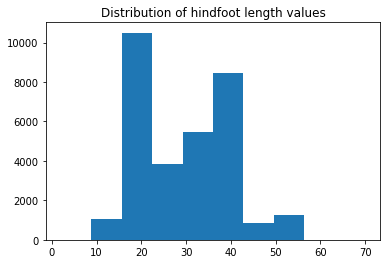

In [23]:
plt.hist(surveys_df.hindfoot_length[surveys_df.hindfoot_length.notnull()])
plt.title('Distribution of hindfoot length values')
plt.show()

We can also call `.plot()` on a Series:

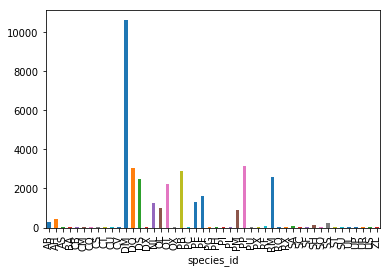

In [24]:
species_counts.plot(kind='bar')

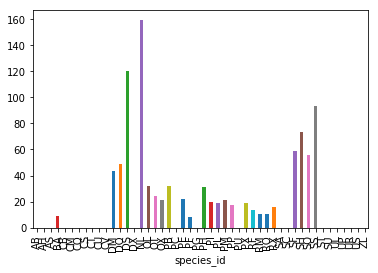

In [25]:
species_mean_weights.plot(kind='bar')

And now for a scatter plot, where we specify which variables are the x and y:

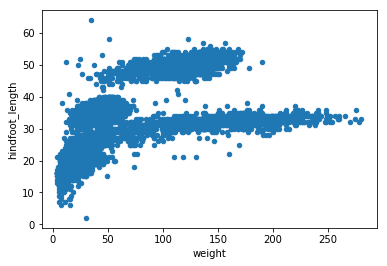

In [26]:
surveys_df.plot(kind='scatter', y='hindfoot_length', x='weight')

## Nicer plotting, with `ggplot`

Let's try a different plotting library, called `ggplot` (from the `plotnine` package), that thinks about plotting data in a different way, in terms of "adding" *data* plus *aesthetics* (colors, shapes, etc.) plus *layers* (which add to or modify the plot)

First we need to import the ggplot library, from the `plotline` package:

In [29]:
from plotnine import *

The first thing we'll do is create a ggplot object and give it:
- Our data frame (`surveys_df`)
- Aesthetics information, such as which variables in our data frame will be used as the independent (x) and dependent (y) variables

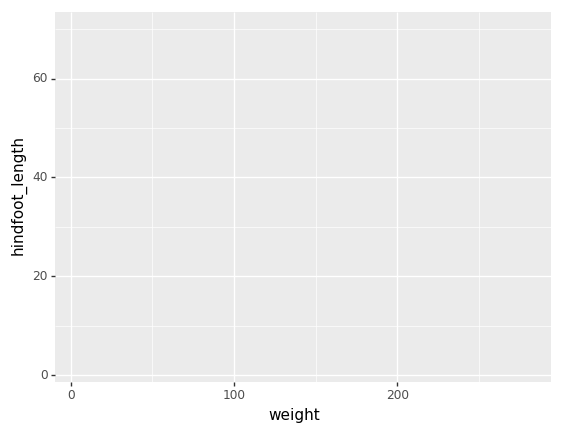

<ggplot: (7551708978)>

In [41]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length')

Hmmm, we get a canvas but it's mysteriously empty!   We need to add a ***layer***, using `+`.  We'll add a layer with points:

/Users/kerchner/anaconda/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 4811 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


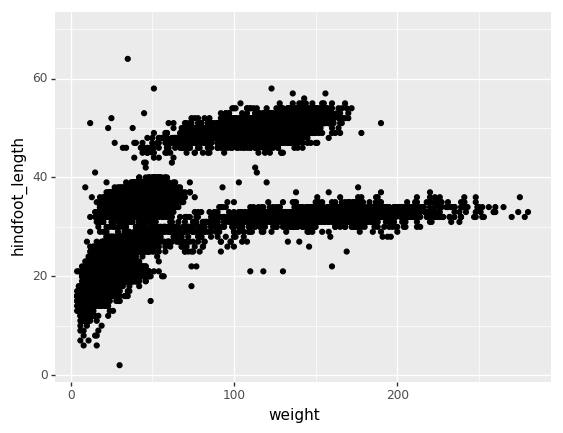

<ggplot: (-9223372029303066599)>

In [42]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length') + geom_point()

Not bad!  Let's see if we can perhaps color-code the points based on the species_id.

In [45]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length', color='species_id') + geom_point()

IndexError: index 48 is out of bounds for axis 1 with size 48

Notice that we get an error.  I'll help you out.  The problem is that we have too many species_id values for a meaningful color layer.   Let's create a subset using just the top 10 species.

Remember earlier we created `species_counts`?  We'll use it and do a bit of sorting to get just the top ten species as as a list:

In [33]:
species_counts.sort_values(ascending=False)

species_id
DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
NL     1252
OL     1006
PM      899
AH      437
AB      303
SS      248
SH      147
SA       75
RF       75
CB       50
BA       46
SO       43
SF       43
DX       40
PC       39
PL       36
PH       32
CQ       16
CM       13
OX       12
UR       10
PI        9
PG        8
RO        8
UP        8
PX        6
PU        5
SU        5
US        4
UL        4
RX        2
AS        2
ZL        2
CV        1
CU        1
CT        1
CS        1
SC        1
ST        1
dtype: int64

Now let's chop it down to just the first 10:

In [34]:
species_counts.sort_values(ascending=False)[:10]

species_id
DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
NL     1252
dtype: int64

But we simply want the species ids, not any of the other stuff.  Similar to a Python dictionary, we can use `.keys()` to get that:

In [35]:
species_counts.sort_values(ascending=False)[:10].keys()

Index(['DM', 'PP', 'DO', 'PB', 'RM', 'DS', 'OT', 'PF', 'PE', 'NL'], dtype='object', name='species_id')

And let's use a variable to store our index of top species so we can reuse it:

In [36]:
top_species = species_counts.sort_values(ascending=False)[:10].keys()

Now that we have a simple list of the top 10 species IDs, we can use `.isin()` to create a subset data frame containing just the rows with those species_id values:

Now that our new data frame has a smaller variety of species, let's try it again with species_id as the key for the color:

In [37]:
subset_df = surveys_df[surveys_df.species_id.isin(top_species)]

In [53]:
surveys_plot = ggplot(subset_df) + aes(x = 'weight', y = 'hindfoot_length', color='species_id') + geom_point()

/Users/kerchner/anaconda/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2572 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


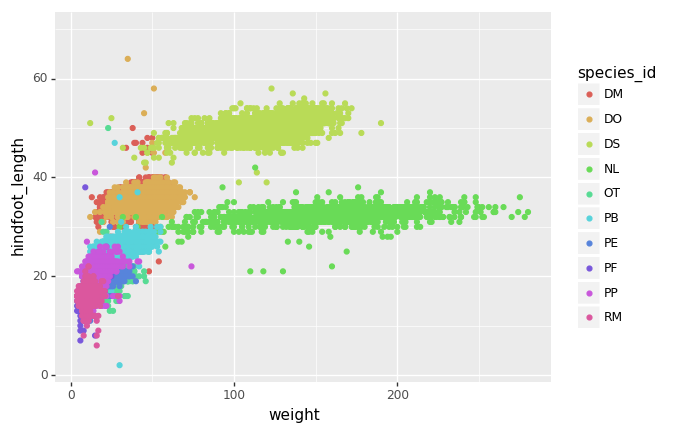

<ggplot: (7556249527)>

In [54]:
surveys_plot

/Users/kerchner/anaconda/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2572 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


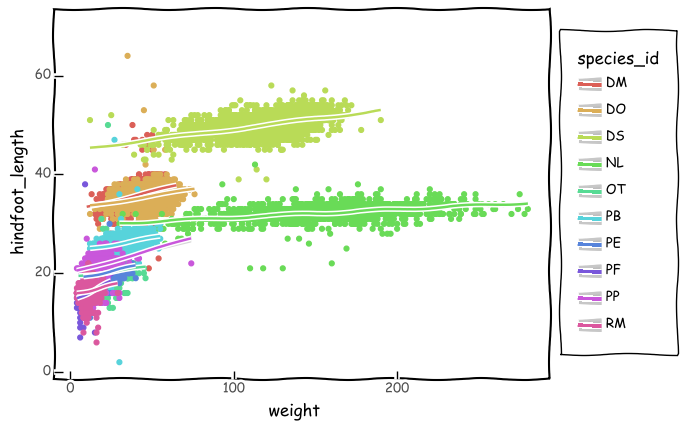

<ggplot: (299706204)>

In [63]:
surveys_plot + stat_smooth() + theme_xkcd()

/Users/kerchner/anaconda/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2572 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


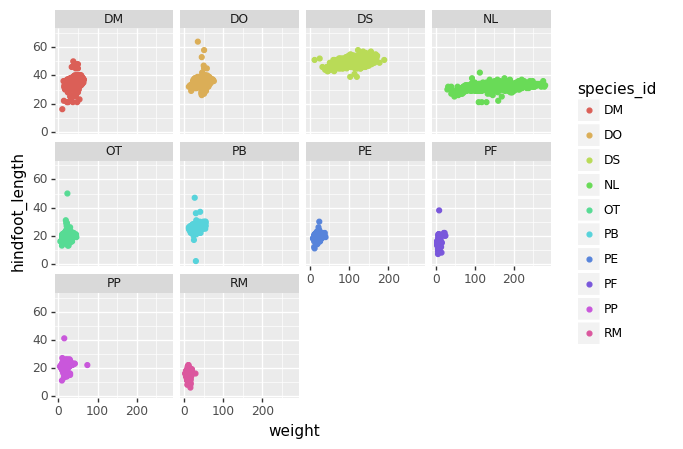

<ggplot: (-9223372029298693474)>

In [57]:
surveys_plot + facet_wrap('~species_id')